In [13]:
import glob
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
from matplotlib import gridspec

import numpy as np
from PIL import Image

In [14]:
# Load the cars and non cars data

cars = glob.glob('./data/vehicles/*/*/*.png')
noncars = glob.glob('./data/non-vehicles/*/*/*.png')

print('Number of vehicles are: ', len(cars))
print('Number of non-vehicles are: ', len(noncars))

Number of vehicles are:  8792
Number of non-vehicles are:  8968


100%|██████████| 2/2 [00:00<00:00,  2.65it/s]


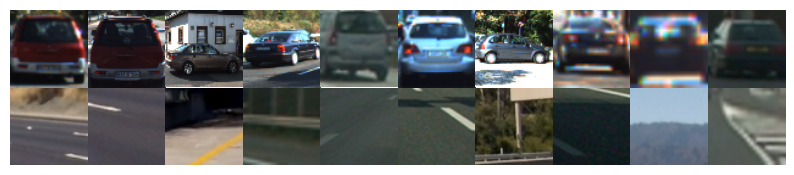

In [15]:
num_draw_examples = 10

fig = plt.figure(figsize=(num_draw_examples, 2))
grid = gridspec.GridSpec(2, num_draw_examples, wspace=0.0, hspace=0.0)

labelset_pbar = tqdm(range(2))
for a in labelset_pbar:
    for b in range(num_draw_examples):
        i = a*(num_draw_examples) + b
        ax = plt.Subplot(fig, grid[i])
        if a == 0:
            image_file = np.random.choice(cars)
        else:
            image_file = np.random.choice(noncars)
        image = Image.open(image_file)
        ax.imshow(image)
        ax.set_xticks([])
        ax.set_yticks([])
        fig.add_subplot(ax)

    # hide the borders\
    all_axes = fig.get_axes()
    for ax in all_axes:
        for sp in ax.spines.values():
            sp.set_visible(False)

plt.show()


Number of mislabelled non-vehicles is:  345


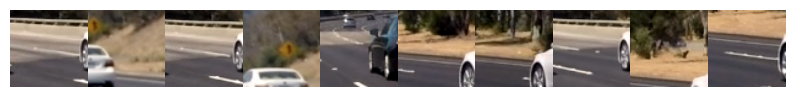

In [16]:
# This script is used to save the mislabeld images
mislabelled = glob.glob('/home/stevenwudi/PycharmProjects/Udacity/SDC-P5/vehicleLab/attempts/Mislabeled/*.png')
print('Number of mislabelled non-vehicles is: ', len(mislabelled))


num_draw_examples = 10

fig = plt.figure(figsize=(num_draw_examples, 1))
grid = gridspec.GridSpec(1, num_draw_examples, wspace=0.0, hspace=0.0)

for b in range(num_draw_examples):
    ax = plt.Subplot(fig, grid[b])
    image_file = np.random.choice(mislabelled)
    image = Image.open(image_file)
    ax.imshow(image)
    ax.set_xticks([])
    ax.set_yticks([])
    fig.add_subplot(ax)

# hide the borders\
all_axes = fig.get_axes()
for ax in all_axes:
    for sp in ax.spines.values():
        sp.set_visible(False)

plt.show()

In [17]:
from skimage.feature import hog
from sklearn.preprocessing import StandardScaler
import cv2
import matplotlib.image as mpimg


In [18]:
def get_hog(img, orient=8, pix_per_cell=4, cell_per_block=2, vis=True, feature_vec=True):
    features, hog_image = hog(
        img, orientations=orient,
        pixels_per_cell=(pix_per_cell, pix_per_cell),
        cells_per_block=(cell_per_block, cell_per_block),
        transform_sqrt=True,
        visualise=vis, feature_vector=feature_vec)
    
    return features, hog_image

In [19]:
img = np.array(image)
feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

features, hog_image = get_hog(feature_image)


100%|██████████| 2/2 [00:01<00:00,  1.01it/s]


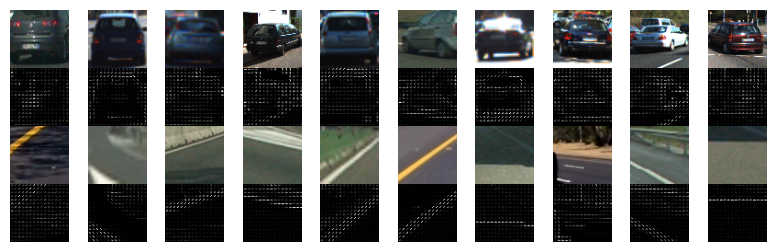

In [20]:
num_draw_examples = 10

fig = plt.figure(figsize=(num_draw_examples, 3))
grid = gridspec.GridSpec(4, num_draw_examples, wspace=0.0, hspace=0.0)
labelset_pbar = tqdm(range(2))

for a in labelset_pbar:
    for b in range(num_draw_examples):
        i = a*(num_draw_examples*2) + b
        ax = plt.Subplot(fig, grid[i])
        if a == 0:
            image_file = np.random.choice(cars)
        else:
            image_file = np.random.choice(noncars)
        image = Image.open(image_file)
        ax.imshow(image)
        ax.set_xticks([])
        ax.set_yticks([])
        fig.add_subplot(ax)
        
        img = np.array(image)
        feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        features, hog_image = get_hog(feature_image)
        
        i = a*(num_draw_examples*2) + b + num_draw_examples
        ax = plt.Subplot(fig, grid[i])
        ax.imshow(hog_image, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        fig.add_subplot(ax)


    # hide the borders\
    all_axes = fig.get_axes()
    for ax in all_axes:
        for sp in ax.spines.values():
            sp.set_visible(False)

plt.show()

In [24]:
mislabelled[0].split('/')[-1]

mislabelled_list = []
for ml in mislabelled:
    mislabelled_list.append(ml.split('/')[-1])

In [25]:
cars = glob.glob('./data/vehicles/*/*/*.png')
noncars = glob.glob('./data/non-vehicles/*/*/*.png')

In [26]:
# Define a function to compute binned color features  
def bin_spatial(img, size=(32, 32)):
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img, size).ravel() 
    # Return the feature vector
    return features

# Define a function to compute color histogram features  
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis:
        features, hog_image = hog(
            img, orientations=orient,
            pixels_per_cell=(pix_per_cell, pix_per_cell),
            cells_per_block=(cell_per_block, cell_per_block),
            transform_sqrt=True,
            visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:
        features = hog(
            img, orientations=orient,
            pixels_per_cell=(pix_per_cell, pix_per_cell),
            cells_per_block=(cell_per_block, cell_per_block),
            transform_sqrt=True, visualise=vis,
            feature_vector=feature_vec)
        return features
    
###### TODO ###########
# Define a function to extract features from a list of images
# Have this function call bin_spatial() and color_hist()
def extract_features(imgs, cspace='RGB', spatial_size=(32, 32), hist_bins=32, hist_range=(0, 256), 
                     orient=9, pix_per_cell=8, cell_per_block=2, hog_channel=0, ignore_list=[]):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        if file.split('/')[-1] not in ignore_list:
            # Read in each one by one
            image = mpimg.imread(file)
            # apply color conversion if other than 'RGB'
            if cspace != 'RGB':
                if cspace == 'HSV':
                    feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
                elif cspace == 'LUV':
                    feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
                elif cspace == 'HLS':
                    feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
                elif cspace == 'YUV':
                    feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            else: feature_image = np.copy(image)      
            # Apply bin_spatial() to get spatial color features
            spatial_features = bin_spatial(feature_image, size=spatial_size)
            # Apply color_hist() also with a color space option now
            hist_features = color_hist(feature_image, nbins=hist_bins, bins_range=hist_range)
            # Append the new feature vector to the features list, we use gray for HOG
            hog_features = get_hog_features(cv2.cvtColor(feature_image, cv2.COLOR_RGB2GRAY), orient, 
                            pix_per_cell, cell_per_block, vis=False, feature_vec=True)


            features.append(np.concatenate((spatial_features, hist_features, hog_features)))
    # Return list of feature vectors
    return features

In [ ]:
t=time.time()
colorspace = 'RGB' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9
pix_per_cell = 4
cell_per_block = 2
hog_channel = 0 # Can be 0, 1, 2, or "ALL"

car_features = extract_features(cars, cspace='RGB', spatial_size=(32, 32), hist_bins=32, hist_range=(0, 256), 
                                   orient=orient,  pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                                   hog_channel=hog_channel, ignore_list=[])
notcar_features = extract_features(noncars, cspace='RGB', spatial_size=(32, 32), hist_bins=32, hist_range=(0, 256), 
                                   orient=orient,  pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                                   hog_channel=hog_channel, ignore_list=mislabelled_list)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to Extract features.')

(17636, 11268)


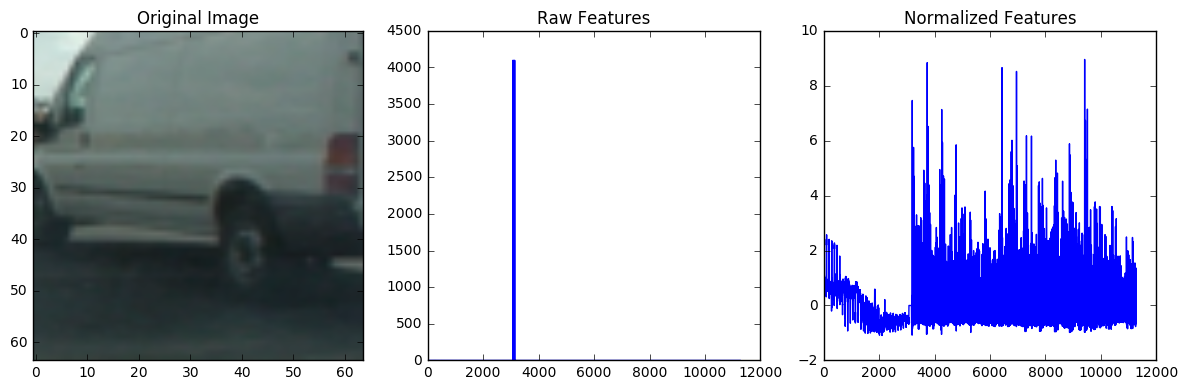

In [28]:
if len(car_features) > 0:
    # Create an array stack of feature vectors
    X = np.vstack((car_features, notcar_features)).astype(np.float64)  
    print(X.shape)
    # Fit a per-column scaler
    X_scaler = StandardScaler().fit(X)
    # Apply the scaler to X
    scaled_X = X_scaler.transform(X)
    car_ind = np.random.randint(0, len(cars))
    # Plot an example of raw and scaled features
    fig = plt.figure(figsize=(12,4))
    plt.subplot(131)
    plt.imshow(mpimg.imread(cars[car_ind]))
    plt.title('Original Image')
    plt.subplot(132)
    plt.plot(X[car_ind])
    plt.title('Raw Features')
    plt.subplot(133)
    plt.plot(scaled_X[car_ind])
    plt.title('Normalized Features')
    fig.tight_layout()
else: 
    print('Your function only returns empty feature vectors...')
    

In [30]:
from sklearn.model_selection import train_test_split

# Create an array stack of feature vectors
X = np.vstack((car_features, notcar_features)).astype(np.float64)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))

# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)
    
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X_train)
# Apply the scaler to X
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)

print('Using:',orient,'orientations',pix_per_cell, 'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))

Using: 9 orientations 4 pixels per cell and 2 cells per block
Feature vector length: 11268


In [31]:
from sklearn.svm import LinearSVC
# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()
n_predict = 10
print('My SVC predicts: ', svc.predict(X_test[0:n_predict]))
print('For these',n_predict, 'labels: ', y_test[0:n_predict])
t2 = time.time()
print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with SVC')

45.79 Seconds to train SVC...
Test Accuracy of SVC =  0.9742
My SVC predicts:  [ 0.  1.  0.  1.  1.  0.  0.  0.  1.  0.]
For these 10 labels:  [ 0.  1.  0.  1.  1.  0.  0.  0.  1.  0.]
0.00127 Seconds to predict 10 labels with SVC


In [32]:
# Here is your draw_boxes function from the previous exercise
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy
    
# Define a function that takes an image,
# start and stop positions in both x and y, 
# window size (x and y dimensions),  
# and overlap fraction (for both x and y)
def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5)):
    # If x and/or y start/stop positions not defined, set to image size
    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None:
        x_start_stop[1] = img.shape[1]
    if y_start_stop[0] == None:
        y_start_stop[0] = 0
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[0]
    # Compute the span of the region to be searched    
    xspan = x_start_stop[1] - x_start_stop[0]
    yspan = y_start_stop[1] - y_start_stop[0]
    # Compute the number of pixels per step in x/y
    nx_pix_per_step = np.int(xy_window[0]*(1 - xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1]*(1 - xy_overlap[1]))
    # Compute the number of windows in x/y
    nx_buffer = np.int(xy_window[0]*(xy_overlap[0]))
    ny_buffer = np.int(xy_window[1]*(xy_overlap[1]))
    nx_windows = np.int((xspan-nx_buffer)/nx_pix_per_step) 
    ny_windows = np.int((yspan-ny_buffer)/ny_pix_per_step) 
    # Initialize a list to append window positions to
    window_list = []
    # Loop through finding x and y window positions
    # Note: you could vectorize this step, but in practice
    # you'll be considering windows one by one with your
    # classifier, so looping makes sense
    for ys in range(ny_windows):
        for xs in range(nx_windows):
            # Calculate window position
            startx = xs*nx_pix_per_step + x_start_stop[0]
            endx = startx + xy_window[0]
            starty = ys*ny_pix_per_step + y_start_stop[0]
            endy = starty + xy_window[1]
            # Append window position to list
            window_list.append(((startx, starty), (endx, endy)))
    # Return the list of windows
    return window_list


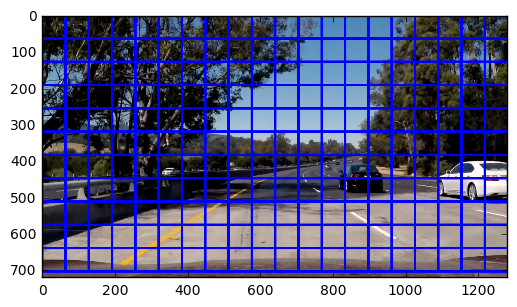

In [33]:
image = mpimg.imread('./test_images/test5.jpg')
windows = slide_window(image, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(128, 128), xy_overlap=(0.5, 0.5))
                       
window_img = draw_boxes(image, windows, color=(0, 0, 255), thick=6)                    
plt.imshow(window_img)

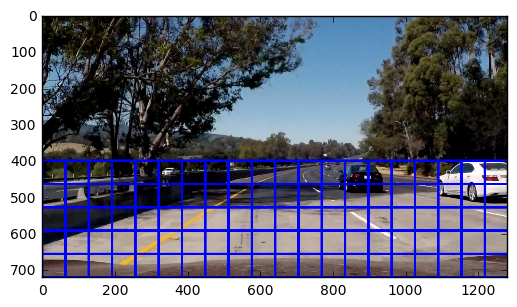

In [34]:
windows = slide_window(image, x_start_stop=[None, None], y_start_stop=[400, None], 
                    xy_window=(128, 128), xy_overlap=(0.5, 0.5))
                       
window_img = draw_boxes(image, windows, color=(0, 0, 255), thick=6)                    
plt.imshow(window_img)

In [35]:
def single_img_features(image, cspace='RGB', spatial_size=(32, 32), hist_bins=32, hist_range=(0, 256), 
                     orient=9, pix_per_cell=8, cell_per_block=2, hog_channel=0):

    if cspace != 'RGB':
        if cspace == 'HSV':
            feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
        elif cspace == 'LUV':
            feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
        elif cspace == 'HLS':
            feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
        elif cspace == 'YUV':
            feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
    else: feature_image = np.copy(image)      
    # Apply bin_spatial() to get spatial color features
    spatial_features = bin_spatial(feature_image, size=spatial_size)
    # Apply color_hist() also with a color space option now
    hist_features = color_hist(feature_image, nbins=hist_bins, bins_range=hist_range)
    # Append the new feature vector to the features list, we use gray for HOG
    hog_features = get_hog_features(cv2.cvtColor(feature_image, cv2.COLOR_RGB2GRAY), orient, 
                    pix_per_cell, cell_per_block, vis=False, feature_vec=True)


    features = np.concatenate((spatial_features, hist_features, hog_features))
    # Return list of feature vectors
    return features

# Define a function you will pass an image 
# and the list of windows to be searched (output of slide_windows())
def search_windows(img, windows, clf, scaler, cspace='RGB', 
                    spatial_size=(32, 32), hist_bins=32, 
                    hist_range=(0, 256), orient=9, 
                    pix_per_cell=8, cell_per_block=2, 
                    hog_channel=0, spatial_feat=True, 
                    hist_feat=True, hog_feat=True):

    #1) Create an empty list to receive positive detection windows
    on_windows = []
    #2) Iterate over all windows in the list
    for window in windows:
        #3) Extract the test window from original image
        test_img = cv2.resize(img[window[0][1]:window[1][1], window[0][0]:window[1][0]], (64, 64))      
        #4) Extract features for that window using single_img_features()
        features = single_img_features(test_img, cspace='RGB', spatial_size=(32, 32), hist_bins=32, hist_range=(0, 256), 
                                   orient=orient,  pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                                   hog_channel=hog_channel)
        
        #5) Scale extracted features to be fed to classifier
        test_features = scaler.transform(np.array(features).reshape(1, -1))
        #6) Predict using your classifier
        prediction = clf.predict(test_features)
        #7) If positive (prediction == 1) then save the window
        if prediction == 1:
            on_windows.append(window)
    #8) Return windows for positive detections
    return on_windows

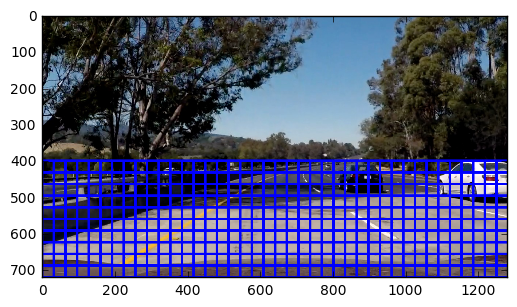

In [36]:
windows = slide_window(image, x_start_stop=[None, None], y_start_stop=[400, None], 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5))
                       
window_img = draw_boxes(image, windows, color=(0, 0, 255), thick=6)                    
plt.imshow(window_img)

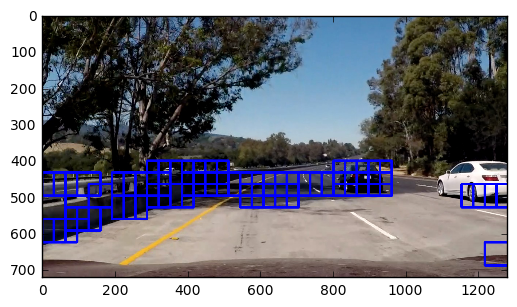

In [37]:
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off

spatial_size=(32, 32)
hist_bins=32
hist_range=(0, 256)
    
    
colorspace = 'RGB' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9
pix_per_cell = 4
cell_per_block = 2
hog_channel = 0 # Can be 0, 1, 2, or "ALL"

hot_windows = search_windows(image, windows, svc, X_scaler, cspace='RGB', 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)                       

draw_image = np.copy(image)
window_img = draw_boxes(draw_image, hot_windows, color=(0, 0, 255), thick=6)                    

plt.imshow(window_img)

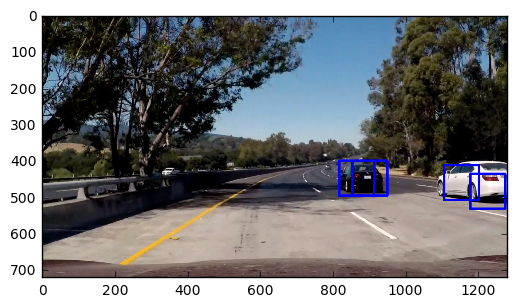

In [52]:
# Define a single function that can extract features using hog sub-sampling and make predictions

def find_cars(image, ystart, ystop, scale, svc, X_scaler, xy_window, threshold=None,
              cspace='RGB', spatial_size=(32, 32), hist_bins=32, hist_range=(0, 256), 
              orient=9, pix_per_cell=8, cell_per_block=2, hog_channel=0):

    draw_img = np.copy(image)
    box_list = []
    ctrans_tosearch = image[ystart:ystop,:,:]
    if scale != 1:
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
        
    hog_image = cv2.cvtColor(ctrans_tosearch, cv2.COLOR_RGB2GRAY)

    # Define blocks and steps as above
    nxblocks = (hog_image.shape[1] // pix_per_cell) - cell_per_block + 1
    nyblocks = (hog_image.shape[0] // pix_per_cell) - cell_per_block + 1 
    nfeat_per_block = orient*cell_per_block**2
    
    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = xy_window[0]
    nblocks_per_window = (window // pix_per_cell) - cell_per_block + 1
    cells_per_step = 2  # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step + 1
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step + 1
    
    # Compute individual channel HOG features for the entire image
    hog_all = get_hog_features(hog_image, orient, pix_per_cell, cell_per_block, feature_vec=False, vis=False)
    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step
            # Extract HOG for this patch
            hog_features = hog_all[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 

            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell

            # Extract the image patch
            subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (64,64))
          
            # Get color features
            spatial_features = bin_spatial(subimg, size=spatial_size)
            hist_features = color_hist(subimg, nbins=hist_bins)
            test_vec = np.hstack((spatial_features, hist_features, hog_features)).reshape(1, -1)
            # Scale features and make a prediction
            test_features = X_scaler.transform(test_vec)    
            #test_features = X_scaler.transform(np.hstack((shape_feat, hist_feat)).reshape(1, -1))  
            if not threshold:
                test_prediction = svc.predict(test_features)
            else:
                test_pred = svc.decision_function(test_features)
                test_prediction =  test_pred > threshold
            
            if test_prediction == 1:
                xbox_left = np.int(xleft*scale)
                ytop_draw = np.int(ytop*scale)
                win_draw = np.int(window*scale)
                cv2.rectangle(draw_img,(xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart),(0,0,255),6) 
                box_list.append([(xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart)])
    return draw_img, box_list
    
ystart = 400
ystop = 656
scale = 1.5
    
out_img, box_list = find_cars(image, ystart, ystop, scale, svc, X_scaler, xy_window=(64, 64), threshold=300,
              cspace='RGB', spatial_size=(32, 32), hist_bins=32, hist_range=(0, 256), 
              orient=9, pix_per_cell=4, cell_per_block=2, hog_channel=0)

plt.imshow(out_img)

## Heat map generation

In [50]:
from scipy.ndimage.measurements import label


def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap# Iterate through list of bboxes
    
def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap_th = np.copy(heatmap)
    heatmap_th[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap_th

def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return img

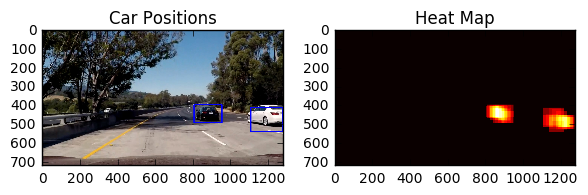

In [65]:
image = mpimg.imread('./test_images/test5.jpg')

heat = np.zeros_like(image[:,:,0]).astype(np.float)
ystart = 400
ystop = 656
for scale in [1, 1.5, 2]:
    out_img, box_list = find_cars(image, ystart, ystop, scale, svc, X_scaler, xy_window=(64, 64), threshold=250,
                  cspace='RGB', spatial_size=(32, 32), hist_bins=32, hist_range=(0, 256), 
                  orient=9, pix_per_cell=4, cell_per_block=2, hog_channel=0)

    # Add heat to each box in box list
    heat = add_heat(heat,box_list)
    
# Apply threshold to help remove false positives
heat = apply_threshold(heat, 2)

# Visualize the heatmap when displaying    
heatmap = np.clip(heat, 0, 255)

# Find final boxes from heatmap using label function
labels = label(heatmap)
draw_img = draw_labeled_bboxes(np.copy(image), labels)

fig = plt.figure()
plt.subplot(121)
plt.imshow(draw_img)
plt.title('Car Positions')
plt.subplot(122)
plt.imshow(heatmap, cmap='hot')
plt.title('Heat Map')
fig.tight_layout()